<a href="https://colab.research.google.com/github/ETorresSacha/clases-MI/blob/main/maching_learning_curso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import pandas as pd
import numpy as np
import io
import os
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


In [86]:
from google.colab import files
uploaded = files.upload()

Saving Advertising.csv to Advertising.csv


In [85]:
os.remove("Advertising.csv") # borra lo datos que se ha subido

In [116]:
data = pd.read_csv(io.BytesIO(uploaded['Advertising.csv']))
data.head()  # Muestra las primeras filas

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [117]:
data = data.iloc[:,1:]
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [107]:
data.info() # Da la informacón de la data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [108]:
data.describe() # resumen estadistico, solo para datos numéricos

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
data.columns # me da los nombres de las columnas

In [ ]:
cols = ['TV', 'Radio', 'Newspaper']
for col in cols:
  plt.plot(data[col],data['Sales'], 'ro')
  plt.title('Ventas respecto a la publicidad en %')
  plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
x = data['TV'].values.reshape(-1,1) # reshape--> modifica en una matriz, convierte un array unidimensional en una matriz columna (2D), donde cada valor ocupa su propia fila (-1,1).
y = data['Sales'].values

In [ ]:
# DIVIDIR EL CONJUNTO DE DATOS ENTRE ENTRENAMIENTO Y TESTING
# En esta parte se selecciona los datos que son para entrenamiento y para testeo,
# test_size selecciona el % porcentaje de datos que se usará para el testeo y el resto será para el entrenmiento
# random_state --> se usa para asegurar que los resultados sean reproducibles.No importa el número
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [99]:
print(x_train.shape)
print(x_test.shape)

(160, 1)
(40, 1)


In [ ]:
lin_reg = LinearRegression() # asume la funcion de regresion lineal
lin_reg.fit(x_train,y_train) # crea una regresion lineal con los datos de entrenamiento que se le añade

In [ ]:
y_pred = lin_reg.predict(x_test) # hace una prediccion de los valores de y_pred con los datos de x_test
y_pred

In [ ]:
print('Predicciones: {}, Reales: {} '.format(y_pred[:4],y_test[:4])) # compara los datos con la prediccion y los datos reales

# En machine learning y estadística, RMSE y R² son dos métricas comunes para evaluar modelos de regresión (es decir, modelos que predicen valores numéricos). Aquí te explico cada una:

[texto del vínculo](https://)📏 1. RMSE — Root Mean Squared Error (Raíz del Error Cuadrático Medio)
Significa cuánto, en promedio, se equivoca el modelo en las predicciones.

Fórmula:

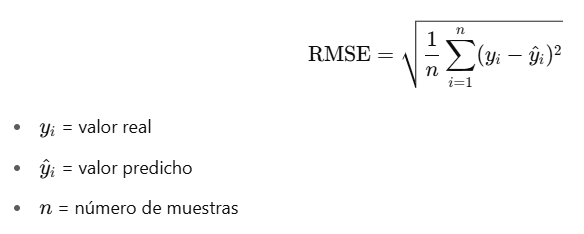

✅ Interpretación:

* Cuanto más bajo sea el RMSE, mejor (cero sería perfecto).
* Tiene las mismas unidades que la variable que estás prediciendo.

📈 2. R² — Coeficiente de determinación
Mide qué tan bien el modelo explica la variabilidad de los datos reales.

Fórmula:


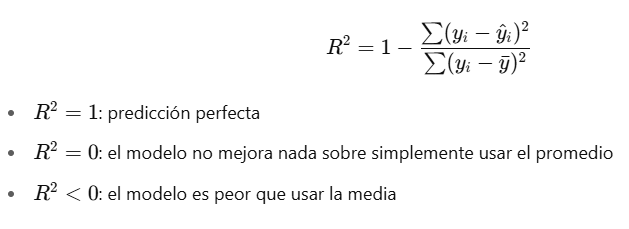

In [ ]:
#RMSE
#rmse = mean_squared_error(y_test, y_pred, squared = False)
mse = mean_squared_error(y_test, y_pred) # devuelve el error cuadrático medio
rmse = np.sqrt(mse)                      # devuelve la raiz acuadrada del error cuadrático medio
print('RMSE:',rmse)
#R2
r2=r2_score(y_test,y_pred)
print('R2: ',r2)

In [ ]:
plt.plot(x_test,y_test,'ro') # estos son los valores reales
plt.plot(x_test,y_pred)     # estos son los valores con la predicción
plt.show()

In [124]:
import seaborn as sns

# FUNCIÓN PARA CADA UNO DE LOS DATOS-DINÁMICO

['TV', 'Radio', 'Newspaper']
elige el elemento que deseas: TV

Comparación de los resultados reales con los datos de predicción
Predicciones: [14.71794394 16.2115484  20.74819743  7.66403631], Reales: [16.9 22.4 21.4  7.3] 

Datos métricos
RMSE: 3.194472431998898
R2:  0.6766954295627076

 Gráfico


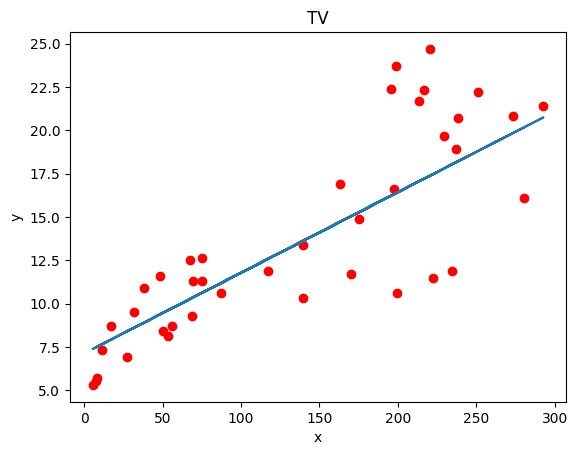

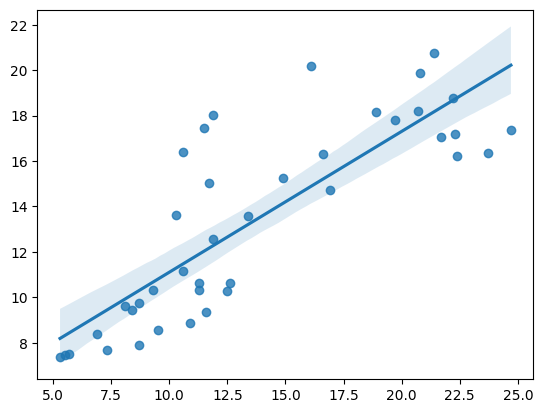

In [127]:
def funcionRegresion (data):
 # columns = data.columns # me da los nombres de las columnas
  data1 = data
  data= data.iloc[:,:3]
  columns = list(data.columns)
  print(columns)
  elemento = input('elige el elemento que deseas: ')
  #Seleccionamos los datos para el elemento determinado
  x = data[elemento].values.reshape(-1,1) # reshape--> modifica en una matriz, convierte un array unidimensional en una matriz columna (2D), donde cada valor ocupa su propia fila (-1,1).
  y = data1['Sales'].values

  # Seleccionamos los datos para entrenamiento y testeo
  x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

  # Crea la regresión lineal
  lin_reg = LinearRegression() # asume la funcion de regresion lineal
  lin_reg.fit(x_train,y_train) # crea una regresion lineal con los datos de entrenamiento que se le añade

  # Hace una predicción
  y_pred = lin_reg.predict(x_test) # hace una prediccion de los valores de y_pred con los datos de x_test
  y_pred

  # Compara
  print('\nComparación de los resultados reales con los datos de predicción')
  print('Predicciones: {}, Reales: {} '.format(y_pred[:4],y_test[:4])) # compara los datos con la prediccion y los datos reales

  # Realiza los datos métricos
  #RMSE
  #rmse = mean_squared_error(y_test, y_pred, squared = False)
  mse = mean_squared_error(y_test, y_pred) # devuelve el error cuadrático medio
  rmse = np.sqrt(mse)
  print('\nDatos métricos')                     # devuelve la raiz acuadrada del error cuadrático medio
  print('RMSE:',rmse)
  #R2
  r2=r2_score(y_test,y_pred)
  print('R2: ',r2)

  # Gráfico
  print('\n Gráfico')
  plt.plot(x_test,y_test,'ro') # estos son los valores reales
  plt.plot(x_test,y_pred)     # estos son los valores con la predicción
  plt.title(f"{elemento}")
  plt.xlabel("x")
  plt.ylabel("y")
  plt.show()
  sns.regplot(x=y_test, y=y_pred) # con este codigo muestra la linealidad de los resultados, en otras palabras qué tan bien está funcionando tu modelo de predicción.
  return
funcionRegresion(data)

# Regresión multiple

In [130]:
import seaborn as sns
from sklearn.metrics import r2_score


Comparación de los resultados reales con los datos de predicción
Predicciones: [16.00205249 17.4873792  21.45480309  8.555338  ], Reales: [16.9 22.4 21.4  7.3] 

Datos métricos
RMSE: 3.3260422878644853
R2:  0.649515280538585


<Axes: >

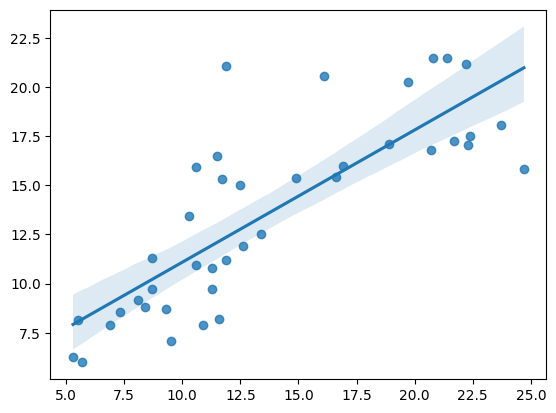

In [132]:
# TV y Periodico

#Seleccionamos los datos para el elemento determinado
x = data.drop(['Radio','Sales'],axis=1).values # elimina las dos culumnas
y = data['Sales'].values

# Seleccionamos los datos para entrenamiento y testeo
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

# Crea la regresión lineal
lin_reg = LinearRegression() # asume la funcion de regresion lineal
lin_reg.fit(x_train,y_train) # crea una regresion lineal con los datos de entrenamiento que se le añade

# Hace una predicción
y_pred = lin_reg.predict(x_test) # hace una prediccion de los valores de y_pred con los datos de x_test

# Compara
print('\nComparación de los resultados reales con los datos de predicción')
print('Predicciones: {}, Reales: {} '.format(y_pred[:4],y_test[:4])) # compara los datos con la prediccion y los datos reales

# Realiza los datos métricos
#RMSE
#rmse = mean_squared_error(y_test, y_pred, squared = False)
mse = mean_squared_error(y_test, y_pred) # devuelve el error cuadrático medio
rmse = np.sqrt(mse)
print('\nDatos métricos')                     # devuelve la raiz acuadrada del error cuadrático medio
print('RMSE:',rmse)
#R2
r2=r2_score(y_test,y_pred)
print('R2: ',r2)

# Gráfico
sns.regplot(x=y_test, y=y_pred) # que tan bueno es la regresion


Comparación de los resultados reales con los datos de predicción
Predicciones: [16.35747252 20.86299397 21.52505848 10.58719845], Reales: [16.9 22.4 21.4  7.3] 

Datos métricos
RMSE: 1.7714254173033515
R2:  0.9005833101920356


<Axes: >

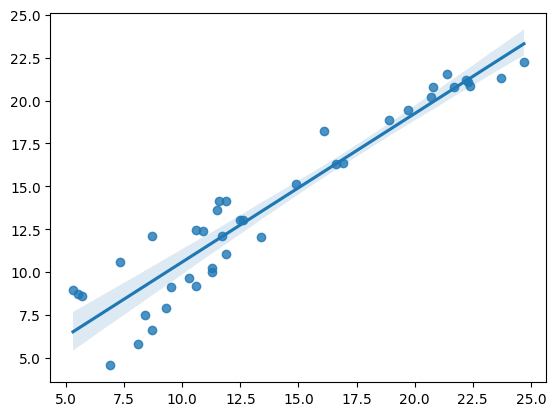

In [129]:
# TV y Radio

#Seleccionamos los datos para el elemento determinado
x = data.drop(['Newspaper','Sales'],axis=1).values # elimina las dos culumnas
y = data['Sales'].values

# Seleccionamos los datos para entrenamiento y testeo
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

# Crea la regresión lineal
lin_reg = LinearRegression() # asume la funcion de regresion lineal
lin_reg.fit(x_train,y_train) # crea una regresion lineal con los datos de entrenamiento que se le añade

# Hace una predicción
y_pred = lin_reg.predict(x_test) # hace una prediccion de los valores de y_pred con los datos de x_test

# Compara
print('\nComparación de los resultados reales con los datos de predicción')
print('Predicciones: {}, Reales: {} '.format(y_pred[:4],y_test[:4])) # compara los datos con la prediccion y los datos reales

# Realiza los datos métricos
#RMSE
#rmse = mean_squared_error(y_test, y_pred, squared = False)
mse = mean_squared_error(y_test, y_pred) # devuelve el error cuadrático medio
rmse = np.sqrt(mse)
print('\nDatos métricos')                     # devuelve la raiz acuadrada del error cuadrático medio
print('RMSE:',rmse)
#R2
r2=r2_score(y_test,y_pred)
print('R2: ',r2)

# Gráfico

sns.regplot(x=y_test, y=y_pred) # que tan bueno es la regresion